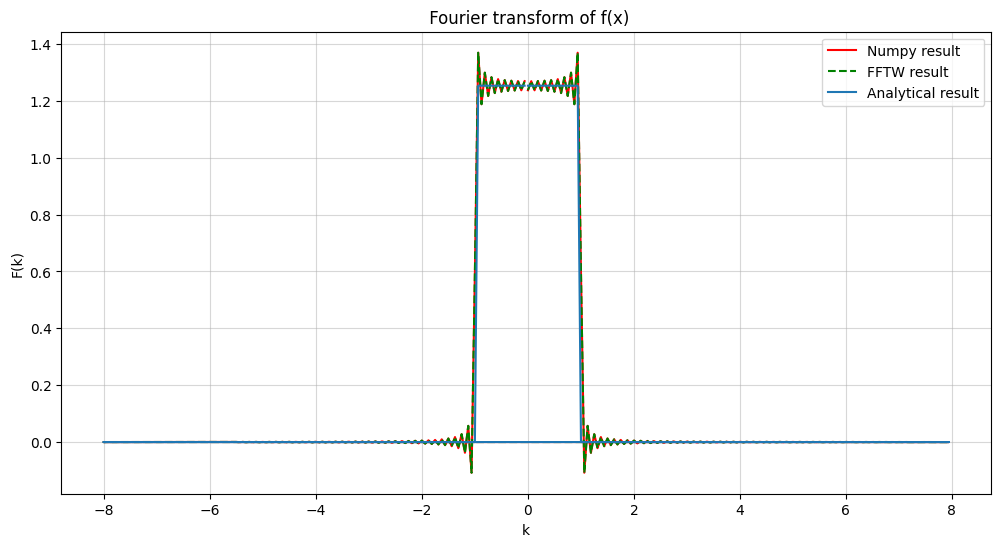

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# define the function
def f(x):
    if x == 0:
        return 1
    else:
        return (np.sin(x)/x)
    
xmin = -50
xmax = 50
n = 256
dx = (xmax - xmin)/(n-1)

'''
    Fourier Transform Using Numpy
'''
# array of x values
xarr = np.linspace(xmin, xmax, n)

# array for f(x) values
fxarr = [f(i) for i in xarr]

# DFT of fxarr
dft_arr = np.fft.fft(fxarr, norm="ortho")    # doubt

# array of k values
karr = (2 * np.pi * np.fft.fftfreq(n, dx))

# Calculate  F(K)
fkarr =  np.zeros(len(dft_arr), dtype=np.complex128)     # array of F(K)

for i in range(len(karr)):
    fkarr[i]=dx*np.sqrt(n/(2*np.pi))*np.exp(-(1j)*karr[i]*xmin)*(dft_arr[i])



''' Analytic Fourier Transform '''

# define the analytical FT
def analytical_ft(k):
    result = np.zeros_like(k)  # Create an array of zeros with the same shape as k
    result[(k > -1) & (k < 1)] = np.sqrt(np.pi / 2)  # Assign pi/2 where -1 < k < 1
    return result 

# array for analytical F(k)
ft_true = analytical_ft(karr)


''' Fourier Transform  using FFTW'''

def read_txt_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming data is whitespace-separated
            values = line.strip().split()
            # Convert values to float if necessary
            data.append([float(value) for value in values])
    return data


fftw_arr = read_txt_file("fftw_FT_sinc.txt")


# Plot the sinc function and its Fourier transform
plt.figure(figsize=(12, 6))

# Plot F(k)
plt.plot(karr, fkarr.real, color = 'r', label = "Numpy result")
plt.plot(karr, fftw_arr, linestyle = '--', color = 'g', label = "FFTW result")
plt.plot(karr, ft_true, label = 'Analytical result')
plt.xlabel('k')
plt.ylabel('F(k)')
plt.title(" Fourier transform of f(x)")
plt.legend()
plt.grid(True, alpha = 0.5)

plt.show()